In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = "plotly"
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
colnames = ['sentiment', 'Headline']
news = pd.read_csv('/content/drive/MyDrive/Bits/Sem 3/NLP_Assignment/all-data.csv',encoding='latin-1', names=colnames, header=None )

In [3]:
news.head()

,sentiment,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
news.columns

Index(['sentiment', 'Headline'], dtype='object')

In [5]:
news.shape

(4846, 2)

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   Headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
news.describe()

,sentiment,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [8]:
news['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

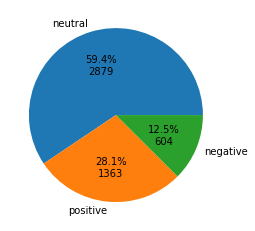

In [9]:
def fmt(x):
    total = news['sentiment'].value_counts().values.sum()
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(news['sentiment'].value_counts().values, labels=news['sentiment'].value_counts().index, autopct=fmt)
plt.show()

In [10]:
news.isnull().sum()

sentiment    0
Headline     0
dtype: int64

In [11]:
news.duplicated().sum()

6

In [12]:
news = news.drop_duplicates()

<Axes: xlabel='count', ylabel='sentiment'>

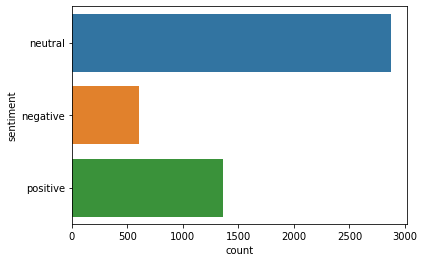

In [13]:
sns.countplot(y="sentiment",data=news)

In [19]:
def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence = re.sub(r'[^A-Za-z0-9]+', ' ', sentence) 
  filtered_words = [word for word in sentence.split() if word not in stopwords.words('english')]
  return " ".join(filtered_words)
news['cleanHeadline']=news['Headline'].map(lambda s:preprocess(s)) 

In [20]:
def lemma(sentence):
  token_words=word_tokenize(sentence)
  lemmatizer = WordNetLemmatizer()
  lemma_words=[lemmatizer.lemmatize(w) for w in token_words]
  return " ".join(lemma_words)
def stem(sentence):
  token_words=word_tokenize(sentence)
  stemmer = PorterStemmer() 
  stem_words=[stemmer.stem(w) for w in token_words]
  return " ".join(stem_words)

In [29]:
news['cleanHeadline']=news['cleanHeadline'].map(lambda s:lemma(s)) 

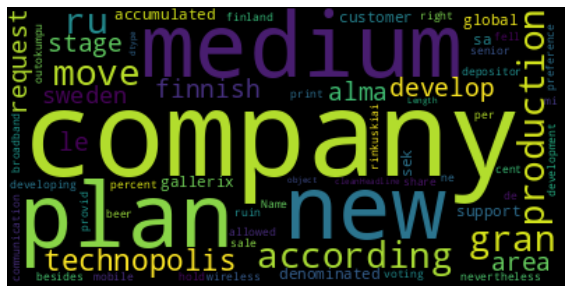

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(news[news['sentiment']== 'neutral']['cleanHeadline']))
# Display the generated image:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

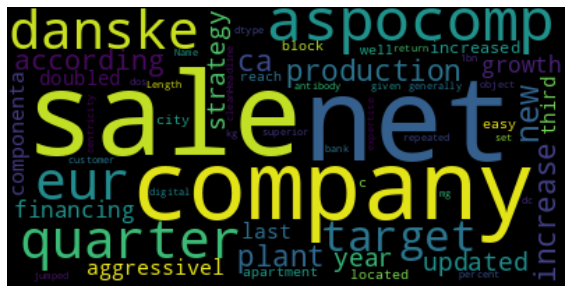

In [41]:
wordcloud = WordCloud().generate(str(news[news['sentiment']== 'positive']['cleanHeadline']))
# Display the generated image:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

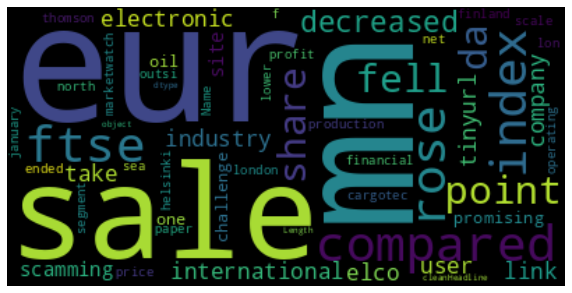

In [42]:
wordcloud = WordCloud().generate(str(news[news['sentiment']== 'negative']['cleanHeadline']))
# Display the generated image:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()